### This script contains the following:

#### 1. Importing libraries and data
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Accessing EnvFile for path

%run EnvFile.ipynb

Stored 'path' (str)


In [4]:
# Import ".csv" file for the SaaS sales dataset.

df = pd.read_csv(os.path.join(path, '01 Data', 'SaaS-Sales.csv'))

In [5]:
df.shape

(9994, 19)

In [6]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/09/22,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/09/22,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/21,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/21,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [7]:
# Create a data frame with just the values we need for plotting

df = df[['Sales', 'Profit', 'Quantity', 'Discount']]
df.head()

,Sales,Profit,Quantity,Discount
0,261.9600,41.9136,2,0.00
1,731.9400,219.5820,3,0.00
2,14.6200,6.8714,2,0.00
3,957.5775,-383.0310,5,0.45
4,22.3680,2.5164,2,0.20


### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

[-4430069250.26038,
 -2466689485.446174,
 -1444364350.9210992,
 -1009021756.5951228,
 -815986576.6746063,
 -658679456.9379809,
 -548789010.9119185,
 -463521837.45048654,
 -388525029.8549556]

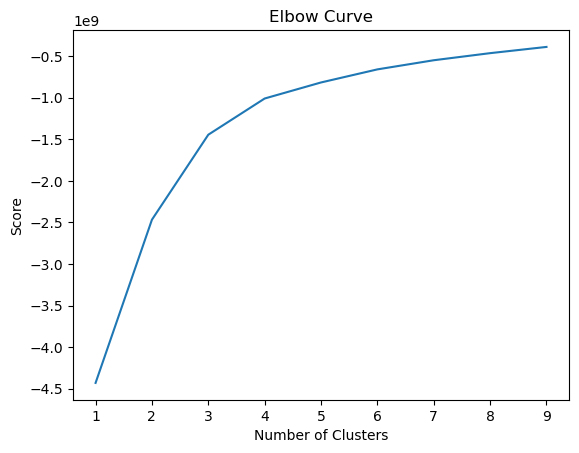

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)


/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
df['clusters'] = kmeans.fit_predict(df)


/Users/dheepika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df.head()


,Sales,Profit,Quantity,Discount,clusters
0,261.9600,41.9136,2,0.00,0
1,731.9400,219.5820,3,0.00,3
2,14.6200,6.8714,2,0.00,0
3,957.5775,-383.0310,5,0.45,3
4,22.3680,2.5164,2,0.20,0


In [15]:
df['clusters'].value_counts()


0    8897
3     975
2     112
1      10
Name: clusters, dtype: int64

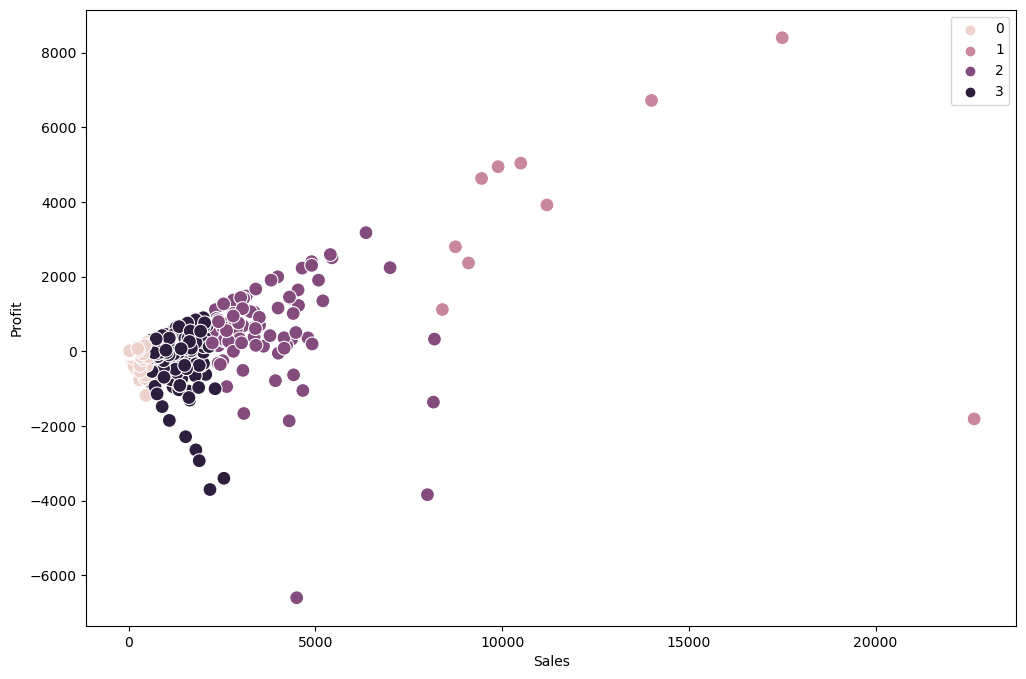

In [16]:
# Plot the clusters for the "Sales" and "Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()


#### The above plot shows that the cluster 0 which includes sales with lesser value can provide both profit and loss but loss predominantly. The same applies to cluster 1. However cluster 2 and cluster 3 with medium and high sales value indicate that the profit is mostly positive with few outliers that caused the loss. 

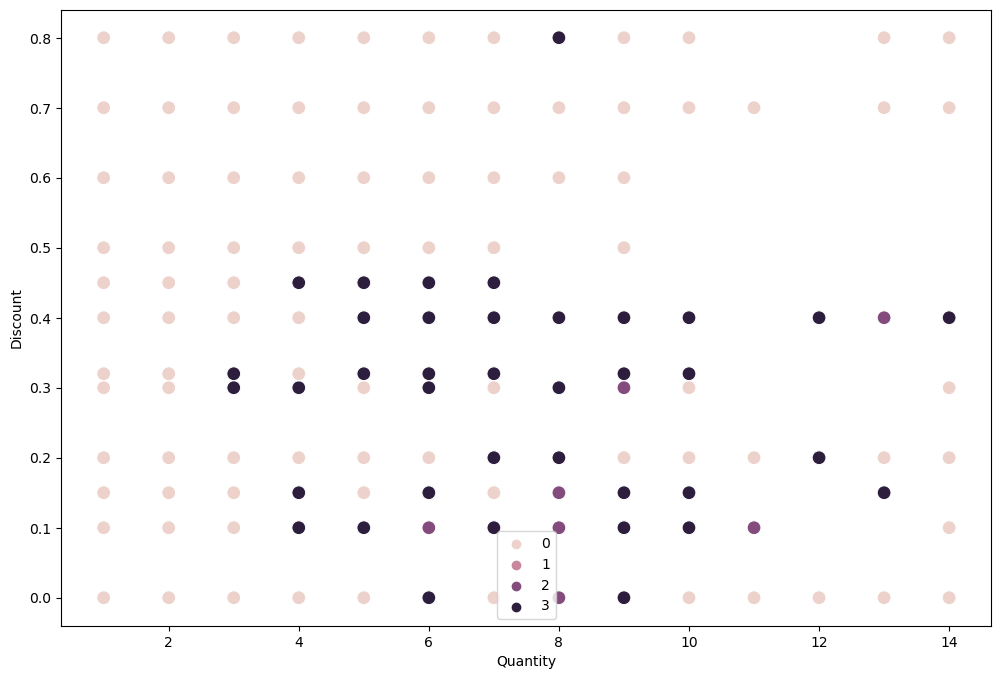

In [17]:
# Plot the clusters for the "Quantity" and "Discount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Quantity'], y=df['Discount'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Quantity') 
plt.ylabel('Discount') 
plt.show()

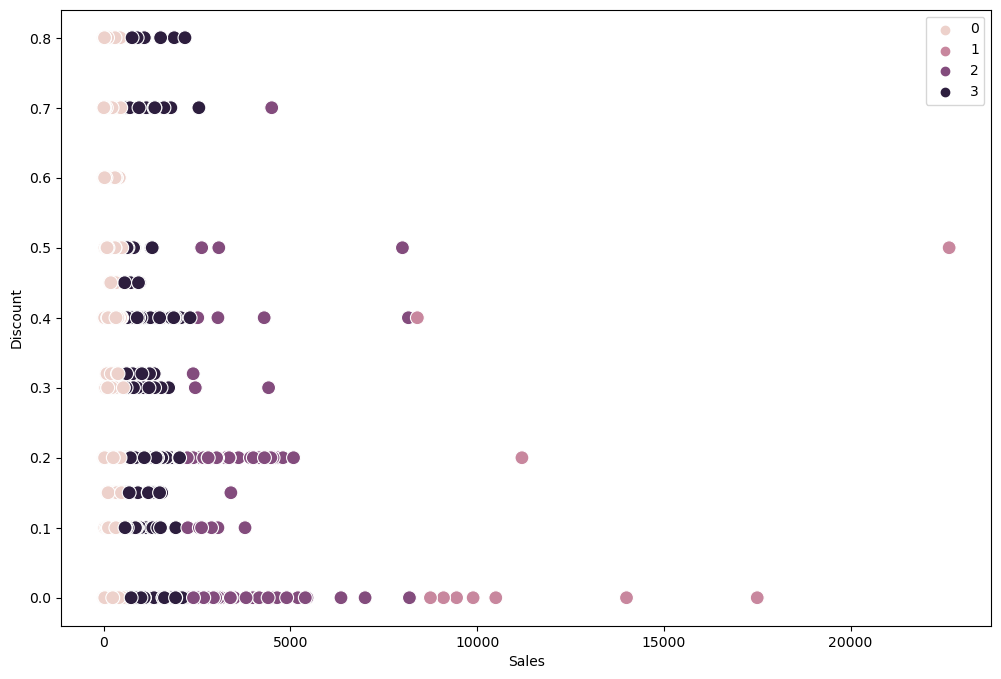

In [18]:
# Plot the clusters for the "Sales" and "Discount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sales'], y=df['Discount'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sales') 
plt.ylabel('Discount') 
plt.show()


#### The above graph indicates that cluster 0 and 1 with less sales have been given discount at all levels. However, cluster 2 and 3 with moderate and high sales indicate that discount is provided comparatively lesser with maxiumum of 0.5 except for some outliers. 

### This indicates that customers with small sales look for discounts much more than that of customers with larger sales. It could also be indicative of the fact that the product cost is bit higher for those small sale customers however, they are more in number indicating that the product is of higher demand which is a good sign. 

### Also, the customer with large sales doesn't demand higher discounts as they probably have more trust and capacity to invest in our products despite its high value.

In [19]:
df.groupby('clusters').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Quantity':['mean', 'median'],
                          'Discount':['mean', 'median']})

Sales                  Profit              Quantity         \
                  mean     median         mean      median      mean median   
clusters                                                                      
0            96.202497     41.568    10.897528     7.40000  3.615488    3.0   
1         12143.087400  10196.355  3813.166090  4275.23215  5.600000    5.0   
2          3418.757059   2956.625   572.424873   624.07970  6.285714    6.0   
3           960.980084    844.116    89.434330   111.30240  5.072821    5.0   

          Discount         
              mean median  
clusters                   
0         0.158004    0.2  
1         0.110000    0.0  
2         0.120268    0.1  
3         0.144369    0.2

### The above stats indicate that customer with higher sales (cluster 2 and 3) doesn't look for discount much.

### The profit is higher with higher sales.

### Quantity doesn't matter much as it is more or less spread across in all clusters. 

In [20]:
df.head()

,Sales,Profit,Quantity,Discount,clusters
0,261.9600,41.9136,2,0.00,0
1,731.9400,219.5820,3,0.00,3
2,14.6200,6.8714,2,0.00,0
3,957.5775,-383.0310,5,0.45,3
4,22.3680,2.5164,2,0.20,0


In [21]:
df.to_excel(os.path.join(path, '01 Data', 'clustered_sales_data.xlsx'))  # Set index=True to include the index (dates) in the exported file